In [50]:
import numpy as np
import matplotlib.pyplot as plt

In [51]:
# --------------------------------------------------
# Dynamic Model and Observer
# --------------------------------------------------

def plant_dynamics(x, u, t, A_mat, B_mat):
    return A_mat @ x + B_mat @ u

def observer_dynamics(x_hat, u, t, y, A_mat, B_mat, C_mat, L_obs):
    y_hat = C_mat @ x_hat
    return A_mat @ x_hat + B_mat @ u + L_obs @ (y - y_hat)


In [52]:
# --------------------------------------------------
# RK4 Simulator
# --------------------------------------------------

def rk4_step(f, x, u, t, h, *args):
    k1 = f(x, u, t, *args)
    k2 = f(x + 0.5*h*k1, u, t + 0.5*h, *args)
    k3 = f(x + 0.5*h*k2, u, t + 0.5*h, *args)
    k4 = f(x + h*k3, u, t + h, *args)
    return x + (h/6)*(k1 + 2*k2 + 2*k3 + k4)


In [ ]:
# --------------------------------------------------
# Initialization
# --------------------------------------------------

J  = 0.01
B  = 0.1
Kt = 0.01
Ke = 0.01
L  = 0.5
R  = 1.0
voltage = 12.0

A_mat = np.array([
    [-B/J,   Kt/J],
    [-Ke/L, -R/L]
])

B_mat = np.array([
    [0.0],
    [1.0/L]
])

C_mat = np.array([[1.0, 0.0]])

# observer gain
L_obs = np.array([
    [50.0],
    [500.0]
])

t0 = 0.0    # start time
tf = 10.0    # end time
h  = 0.01  # steps
t = np.arange(t0, tf + h, h)

x_0 = np.array([0.0, 0.0]) #initial states
x_hat_0 = np.array([2.0, -1.0])  #initial state for observer


In [54]:
# --------------------------------------------------
# Simulation
# --------------------------------------------------

X = []
X_hat = []
T = []

x_k = x_0
x_hat_k = x_hat_0

def voltage(t):
    return np.array([12.0])

for k, tk in enumerate(t):
    X.append(x_k)
    T.append(tk)

    u = voltage(tk)

    x_k = rk4_step(plant_dynamics, x_k, u, tk, h, A_mat, B_mat)
    y = C_mat @ x_k
    
    x_hat_k = rk4_step(observer_dynamics, x_hat_k, u, tk, h, y, A_mat, B_mat, C_mat, L_obs)
    X_hat.append(x_hat_k)
X = np.array(X) 
X_hat = np.array(X_hat) 
T = np.array(T)

omega = X[:, 0]
current = X[:, 1]

omega_hat = X_hat[:, 0]
current_hat = X_hat[:, 1]

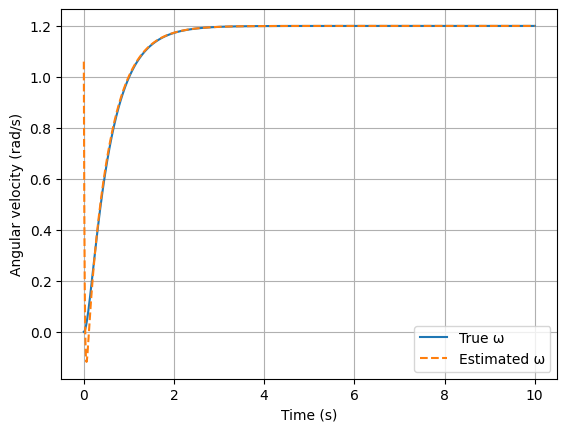

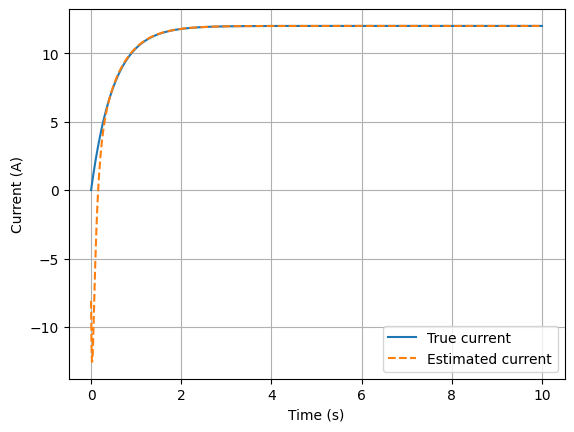

In [55]:
# --------------------------------------------------
# Visualize
# --------------------------------------------------

plt.figure()
plt.plot(t, omega, label="True ω")
plt.plot(t, omega_hat, '--', label="Estimated ω")
plt.xlabel("Time (s)")
plt.ylabel("Angular velocity (rad/s)")
plt.legend()
plt.grid()

plt.figure()
plt.plot(t, current, label="True current")
plt.plot(t, current_hat, '--', label="Estimated current")
plt.xlabel("Time (s)")
plt.ylabel("Current (A)")
plt.legend()
plt.grid()

plt.show()
